In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('customer_churn_data.csv')

In [5]:
df.isna().sum().sum()

297

In [8]:
df["InternetService"]=df["InternetService"].fillna("")

In [10]:
df.isna().sum().sum()

0

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [15]:
numeric_columns_data = df.select_dtypes(   include = ["number"])

In [16]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [17]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [20]:
import matplotlib.pyplot as plt

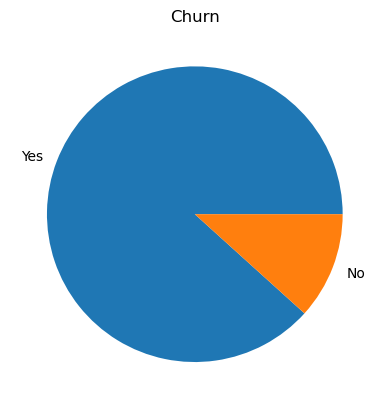

In [21]:
df["Churn"].value_counts().plot(kind = "pie")
plt.title("Churn")
plt.ylabel("")
plt.show()

In [22]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [25]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [26]:
df.groupby(["Churn","Tenure"])["MonthlyCharges"].mean()

Churn  Tenure
No     12         54.827500
       13         51.278750
       14         66.533000
       15         82.840000
       16         65.284286
                    ...    
Yes    94         89.570000
       99        113.930000
       101        54.780000
       105       118.250000
       122        69.580000
Name: MonthlyCharges, Length: 129, dtype: float64

In [27]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

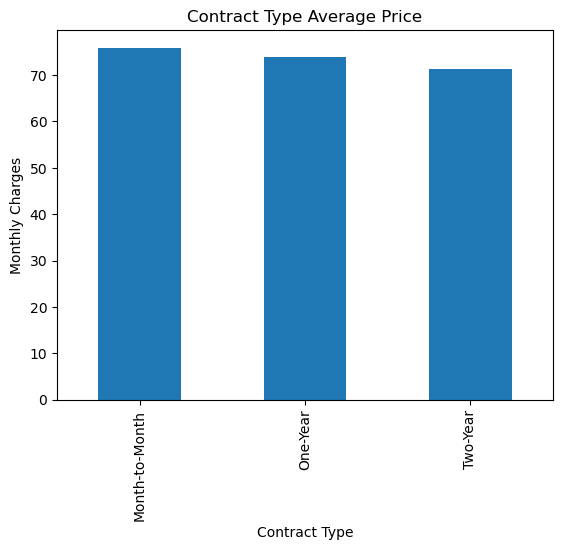

In [29]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Monthly Charges")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

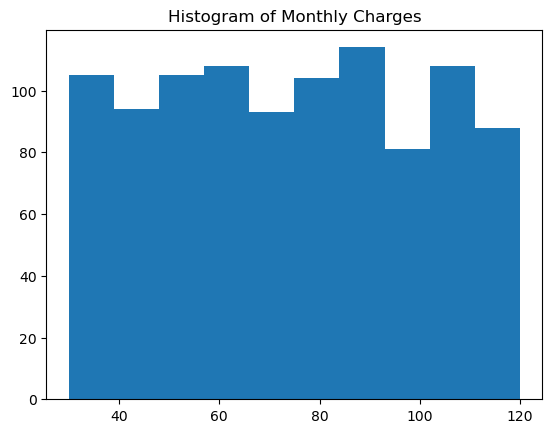

In [30]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

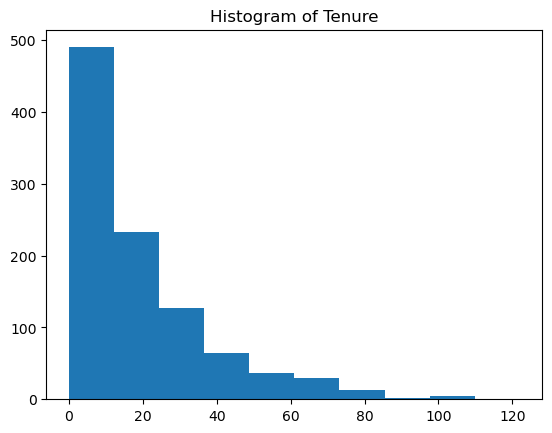

In [31]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [32]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [71]:
y = df[["Churn"]]
X = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [72]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [74]:
X["Gender"]=X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\Devad\AppData\Local\Temp\ipykernel_29464\810230753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"]=X["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [75]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [53]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [56]:
y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [84]:
X_train["Gender"]=X_train["Gender"].apply(lambda x: 1 if x == "Female" else 0)

In [85]:
X_train

,Age,Gender,Tenure,MonthlyCharges
771,39,0,67,118.12
482,28,0,11,89.13
915,47,1,22,82.70
75,53,0,37,83.58
864,38,1,11,76.30
...,...,...,...,...
30,38,0,34,102.27
278,45,0,5,110.06
564,57,1,40,103.32
556,40,1,4,85.15


In [86]:
y_train["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

771    1
482    1
915    1
75     1
864    1
      ..
30     1
278    1
564    1
556    1
566    1
Name: Churn, Length: 800, dtype: int64

In [88]:
y_test["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

971    1
32     1
367    1
264    0
886    1
      ..
258    1
85     1
250    1
361    1
518    0
Name: Churn, Length: 200, dtype: int64

In [89]:
X_test["Gender"]=X_test["Gender"].apply(lambda x: 1 if x == "Female" else 0)

In [90]:
X_test

,Age,Gender,Tenure,MonthlyCharges
971,38,1,16,35.53
32,44,1,20,42.63
367,45,1,22,33.14
264,42,0,31,57.58
886,50,0,7,91.40
...,...,...,...,...
258,49,0,1,42.97
85,39,0,38,68.91
250,32,1,1,37.45
361,60,0,37,75.95


In [91]:
X_train = scaler.fit_transform(X_train)

In [92]:
import joblib
joblib.dump(scaler , "scaler.pkl")

['scaler.pkl']

In [93]:
scaled_X_test = scaler.fit_transform(X_test)

In [94]:
from sklearn.metrics import accuracy_score
def modelperf(predictions):
    print("Accuracy score of model is {}",format(accuracy_score(y_test,predictions)))

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
log_model = LogisticRegression()

In [99]:
import warnings 
warnings.filterwarnings("ignore")

In [100]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [107]:
y_pred = log_model.predict(X_test)

In [108]:
modelperf(y_pred)

Accuracy score of model is {} 0.885


In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
param_grid = { "n_neighbors": [3,5,7,9],"weights" : ["uniform","distance"]}

In [111]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [112]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [113]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [115]:
y_pred = gridkn.predict(X_test)

In [116]:
modelperf(y_pred)

Accuracy score of model is {} 0.9


In [117]:
from sklearn.svm import SVC

In [118]:
svm = SVC()

In [119]:
param_grid = { "C" : [0.01,0.1,0.5,1], "kernel": ["linear","rbf","poly"]}

In [120]:
gridsvc = GridSearchCV(svm,param_grid,cv=5)

In [121]:
gridsvc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [122]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [124]:
y_pred = gridsvc.predict(X_test)

In [126]:
modelperf(y_pred)

Accuracy score of model is {} 0.9


In [127]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
param_grid = { "criterion" : ["gini","entropy"],
              "splitter": ["best","random"],
               "max_depth": [None,10,20,30],
                "min_samples_split": [2,5,10],
                 "min_samples_leaf": [1,2,5]
                 }

In [137]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [138]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [140]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [141]:
y_pred = grid_tree.predict(X_test)

In [142]:
modelperf(y_pred)

Accuracy score of model is {} 0.88


In [143]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [145]:
param_grid = { 
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [146]:
grid_rfc = GridSearchCV(rfc_model,param_grid,cv=5)

In [147]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [148]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 64}

In [150]:
y_pred = grid_rfc.predict(X_test)

In [151]:
modelperf(y_pred)

Accuracy score of model is {} 0.9


In [152]:
best_model = gridsvc.best_estimator_

In [153]:
joblib.dump(best_model,"model.pkl")

['model.pkl']